In [18]:
#Import all the given datasets and explore shape and size of each.
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#import first data set
train_df  = pd.read_csv('train_data.csv')
train_df.shape

(148670, 34)

In [20]:
#import second data set
test_df  = pd.read_csv('test_data.csv')
test_df.shape


(63717, 33)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [22]:
train_df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [23]:
train_df.head(15)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [24]:
replaceStruct = {
                "loan_limit": {"cf": 1, "ncf": 2},
                "approv_in_adv": {"nopre": 1, "pre":2 },
                "loan_purpose": {"p1": 1, "p2":2 ,"p3":3, "p4":4},
                "Neg_ammortization":{"neg_amm": 1, "not_neg": 2 } ,
                "age":{"<25":1,">74":2,"25-34":3,"35-44":4,"45-54":5,"55-64":6,"65-74":7} ,
                "submission_of_application":{"not_inst": 1, "to_inst": 2 } ,
                "Credit_Worthiness": {"l1": 1, "l2": 2},
                "interest_only": {"not_int": 1, "int_only": 2},
                "lump_sum_payment": {"not_lpsm": 1, "lpsm": 2},
                "Secured_by": {"home": 1, "land": 2},
                "total_units": {"1U": 1, "2U": 2,"3U": 3,"4U": 4},
                "loan_type":{"type1": 1, "type2": 2,"type3": 3},
                "Gender":{"Female": 1, "Joint": 2,"Male": 3,"Sex Not Available":4}
                    }

train_df=train_df.replace(replaceStruct)
test_df=test_df.replace(replaceStruct)

In [25]:
train_df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [26]:
train_df = train_df.fillna(train_df.mean())
test_df=test_df.fillna(train_df.mean())

In [27]:
#Data cleansing:
#Missing value treatment.
#counting the number of missing values in each column
train_df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [28]:
test_df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1   

In [29]:
train_df = train_df.fillna(train_df.median())
test_df=test_df.fillna(train_df.median())

In [30]:
train_df.shape

(148670, 34)

In [31]:
test_df.shape

(63717, 33)

In [32]:
train_df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [33]:
test_df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1   

In [34]:
train_df.head(15)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1.000000,4,1.0,1,1.0,1,nopc,nob/c,...,EXP,758,CIB,3.0,2.0,98.728814,south,direct,1,45.000000
1,24891,2019,1.000000,3,1.0,2,1.0,1,nopc,b/c,...,EQUI,552,EXP,6.0,2.0,72.746457,North,direct,1,37.732932
2,24892,2019,1.000000,3,2.0,1,1.0,1,nopc,nob/c,...,EXP,834,CIB,4.0,2.0,80.019685,south,direct,0,46.000000
3,24893,2019,1.000000,3,1.0,1,4.0,1,nopc,nob/c,...,EXP,587,CIB,5.0,1.0,69.376900,North,direct,0,42.000000
4,24894,2019,1.000000,2,2.0,1,1.0,1,nopc,nob/c,...,CRIF,602,EXP,3.0,1.0,91.886544,North,direct,0,39.000000
5,24895,2019,1.000000,2,2.0,1,1.0,1,nopc,nob/c,...,EXP,864,EXP,4.0,1.0,70.089286,North,direct,0,40.000000
6,24896,2019,1.000000,2,2.0,1,3.0,1,nopc,nob/c,...,EXP,860,EXP,6.0,2.0,79.109589,North,direct,0,44.000000
7,24897,2019,1.068659,1,1.0,1,4.0,1,nopc,nob/c,...,CIB,863,CIB,6.0,2.0,86.525974,North,direct,0,42.000000
8,24898,2019,1.000000,2,1.0,1,3.0,1,nopc,nob/c,...,CIB,580,EXP,6.0,2.0,78.765690,central,direct,0,44.000000
9,24899,2019,1.000000,4,1.0,3,3.0,1,nopc,nob/c,...,CIB,788,EXP,6.0,2.0,63.444767,south,direct,0,30.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

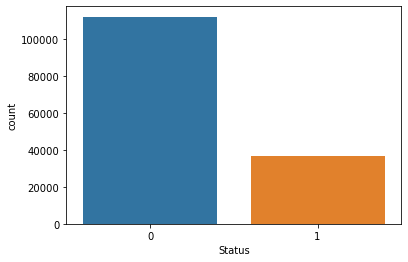

In [35]:
#univariate analysis
sns.countplot(train_df['Status'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


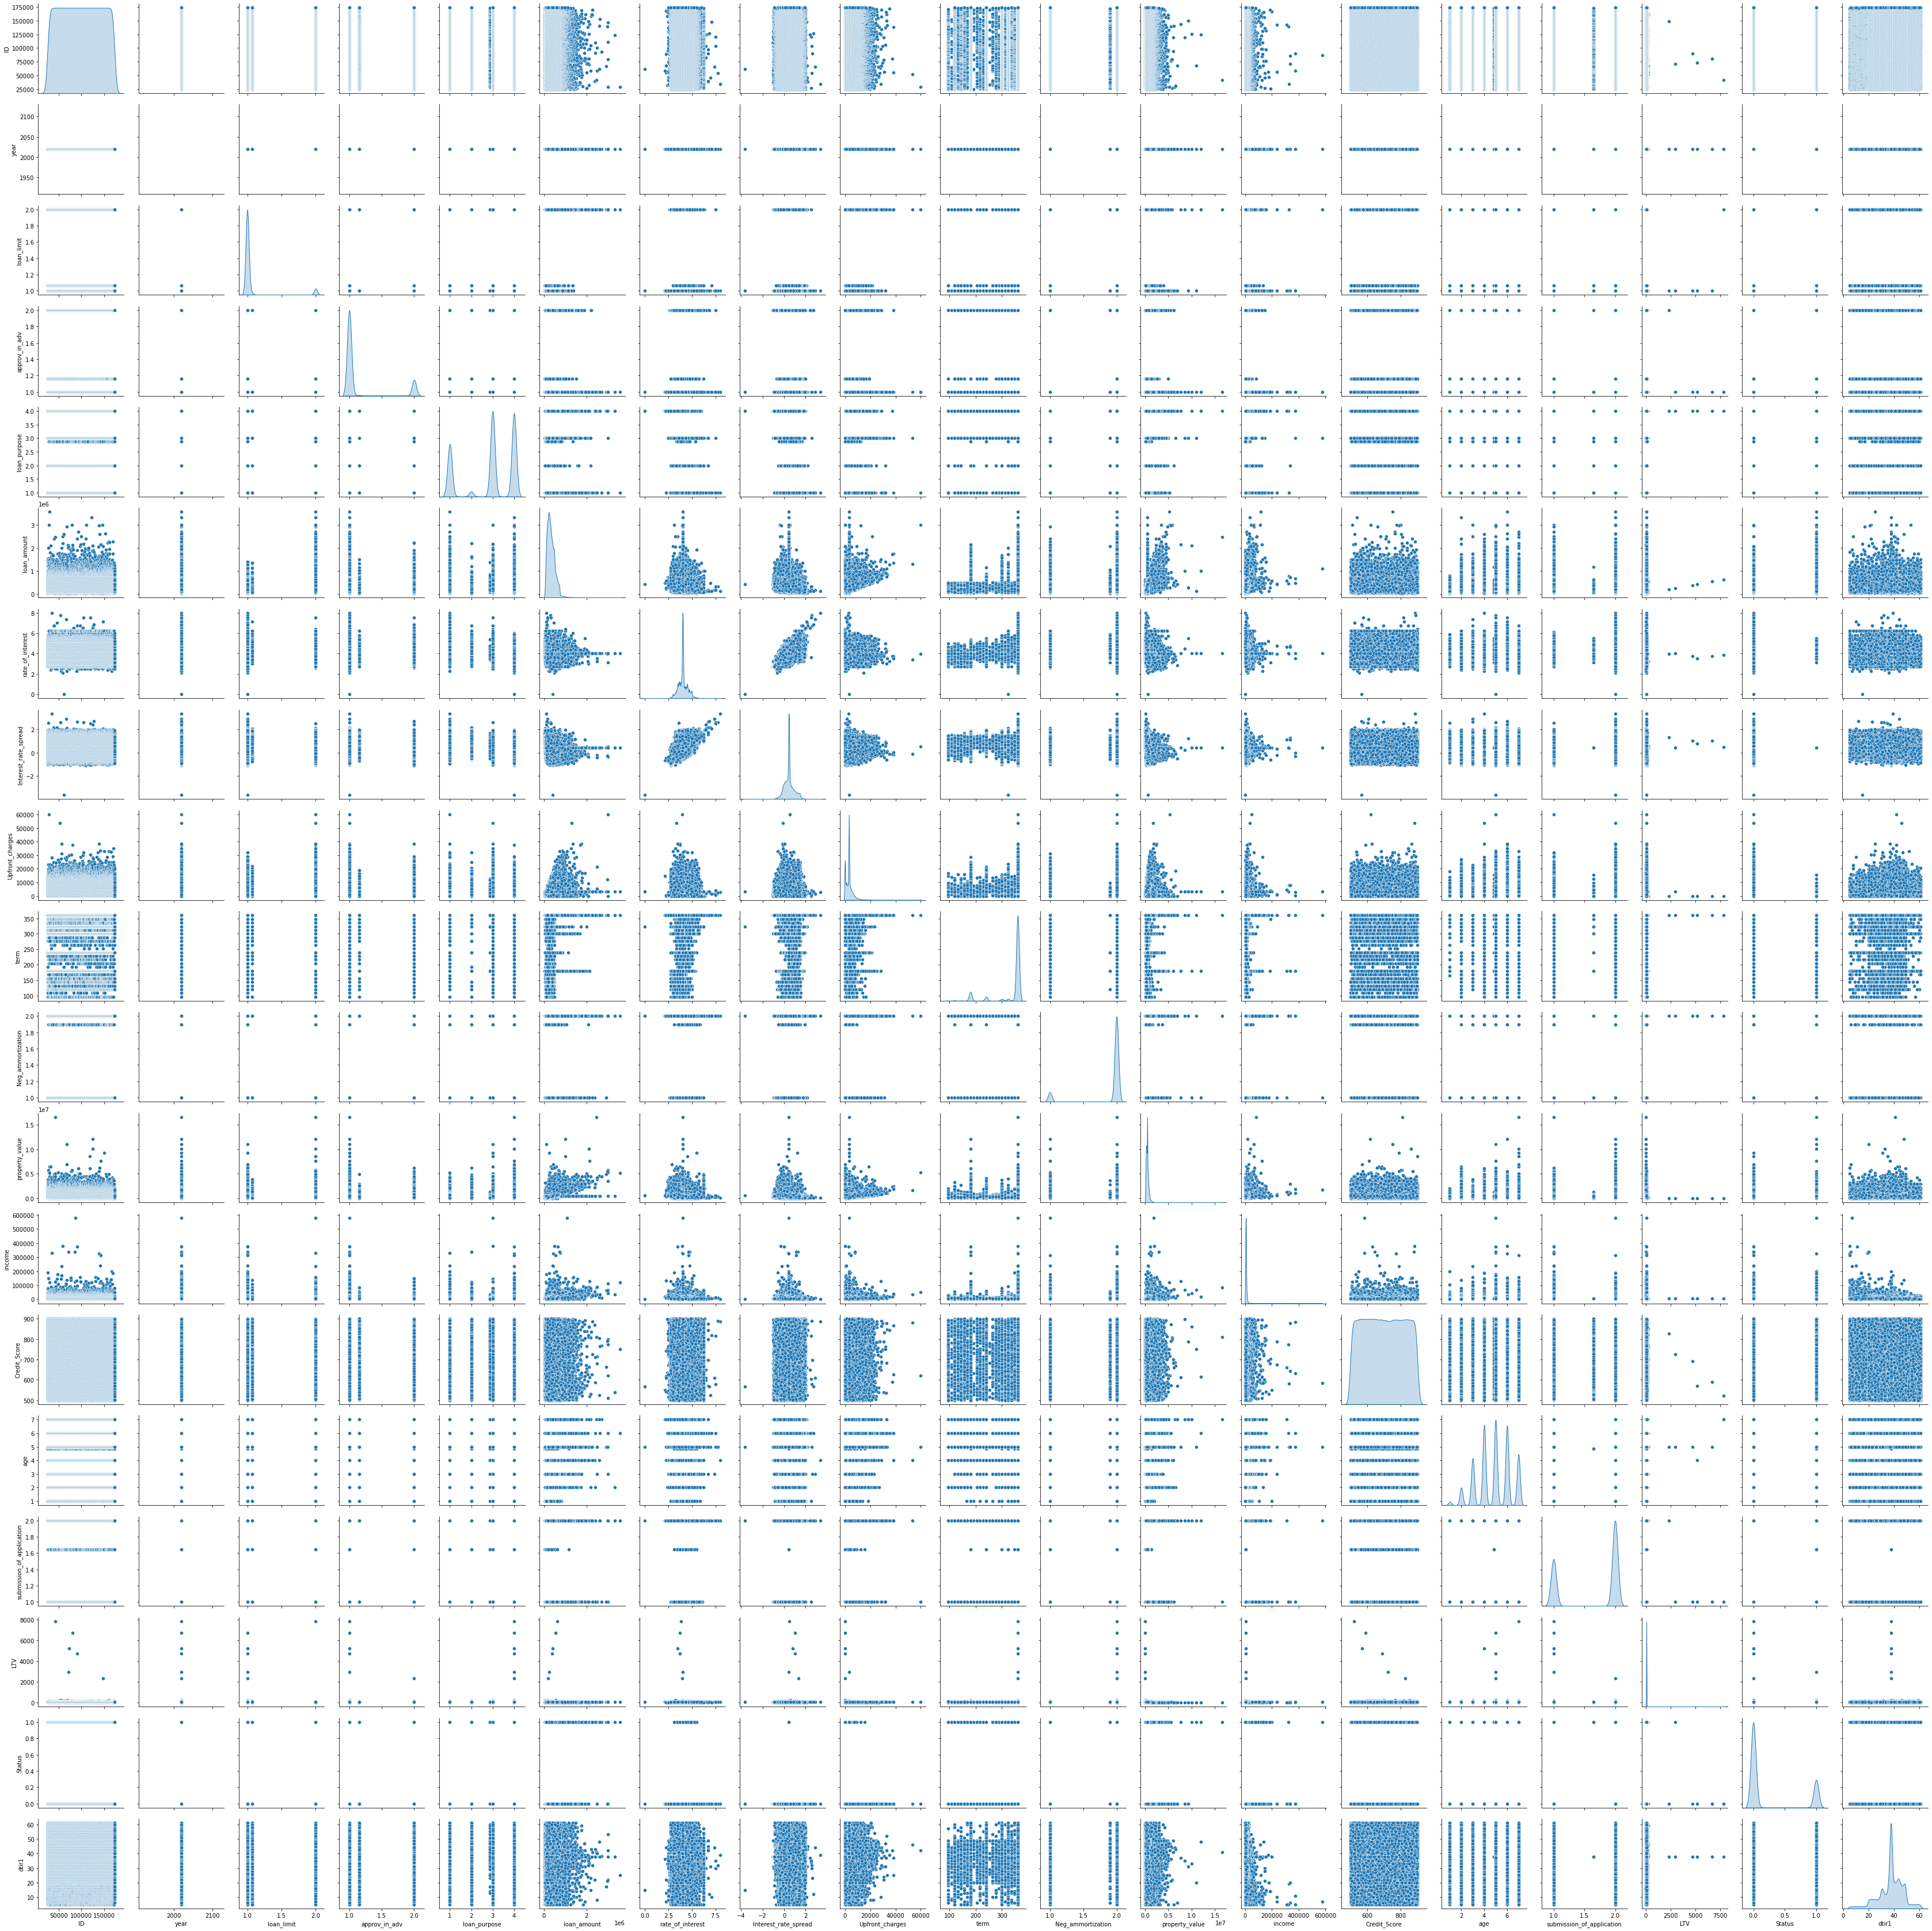

In [77]:
sns.pairplot(train_df, diag_kind = 'kde')

In [36]:
#levels of Churn variable
train_df['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [37]:
train_df.head(15)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,1.000000,4,1.0,1,1.0,1,nopc,nob/c,...,EXP,758,CIB,3.0,2.0,98.728814,south,direct,1,45.000000
1,24891,2019,1.000000,3,1.0,2,1.0,1,nopc,b/c,...,EQUI,552,EXP,6.0,2.0,72.746457,North,direct,1,37.732932
2,24892,2019,1.000000,3,2.0,1,1.0,1,nopc,nob/c,...,EXP,834,CIB,4.0,2.0,80.019685,south,direct,0,46.000000
3,24893,2019,1.000000,3,1.0,1,4.0,1,nopc,nob/c,...,EXP,587,CIB,5.0,1.0,69.376900,North,direct,0,42.000000
4,24894,2019,1.000000,2,2.0,1,1.0,1,nopc,nob/c,...,CRIF,602,EXP,3.0,1.0,91.886544,North,direct,0,39.000000
5,24895,2019,1.000000,2,2.0,1,1.0,1,nopc,nob/c,...,EXP,864,EXP,4.0,1.0,70.089286,North,direct,0,40.000000
6,24896,2019,1.000000,2,2.0,1,3.0,1,nopc,nob/c,...,EXP,860,EXP,6.0,2.0,79.109589,North,direct,0,44.000000
7,24897,2019,1.068659,1,1.0,1,4.0,1,nopc,nob/c,...,CIB,863,CIB,6.0,2.0,86.525974,North,direct,0,42.000000
8,24898,2019,1.000000,2,1.0,1,3.0,1,nopc,nob/c,...,CIB,580,EXP,6.0,2.0,78.765690,central,direct,0,44.000000
9,24899,2019,1.000000,4,1.0,3,3.0,1,nopc,nob/c,...,CIB,788,EXP,6.0,2.0,63.444767,south,direct,0,30.000000


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  float64
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  float64
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  float64
 7   Credit_Worthiness          148670 non-null  int64  
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           148670 non-null  float64
 12  Interest_rate_spread       148670 non-null  float64
 13  Upfront_charges            14

In [40]:
#Data pre-processing
#Segregate predictors vs target attributes

train_df = train_df.drop(['Security_Type','Region','co-applicant_credit_type','credit_type','business_or_commercial','open_credit','construction_type','occupancy_type'] , axis=1) 

test_df=test_df.drop(['Security_Type','Region','co-applicant_credit_type','credit_type','business_or_commercial','open_credit','construction_type','occupancy_type'] , axis=1)
X = train_df.drop(['ID','Status'] , axis=1)

y = train_df['Status']


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 148670 non-null  float64
 3   Gender                     148670 non-null  int64  
 4   approv_in_adv              148670 non-null  float64
 5   loan_type                  148670 non-null  int64  
 6   loan_purpose               148670 non-null  float64
 7   Credit_Worthiness          148670 non-null  int64  
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  Interest_rate_spread       148670 non-null  float64
 11  Upfront_charges            148670 non-null  float64
 12  term                       148670 non-null  float64
 13  Neg_ammortization          14

In [47]:
#Perform train-test split.
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25,
#                                                   random_state=22)
#X_train.shape,X_test.shape
X_train = train_df.drop(['ID','Status'] , axis=1)
Y_train = train_df["Status"]
X_test  = test_df.drop("ID", axis=1).copy()

In [48]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(X_train, Y_train)

In [51]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_smote, y_train_smote)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(x_train_smote, y_train_smote) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train_smote, y_train_smote)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(x_train_smote, y_train_smote) * 100, 2)
print(round(acc_log,2,), "%")

55.41 %


In [53]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_smote, y_train_smote)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(x_train_smote, y_train_smote) * 100, 2)
print(round(acc_knn,2,), "%")

94.91 %


In [54]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train_smote, y_train_smote)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(x_train_smote, y_train_smote) * 100, 2)
print(round(acc_gaussian,2,), "%")

93.76 %


In [55]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_smote, y_train_smote)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = decision_tree.score(x_train_smote, y_train_smote) * 100
print(round(acc_decision_tree,2,), "%")

100.0 %


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(x_train_smote, y_train_smote)
 
# Mode performance
 
y_pred = svm.predict(X_test)
svm1 = svm.score(x_train_smote, y_train_smote) * 100
print(round(svm1,2,), "%")

In [ ]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [ ]:
#Add hidden layers
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(x_train_smote),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Add Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model = define_model()
result = model.predict(X_test)

In [56]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train_smote, y_train_smote)
Y_prediction = random_forest.predict(X_test)

random_forest.score(x_train_smote, y_train_smote)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")



oob score: 100.0 %


In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest,x_train_smote, y_train_smote, cv=5)
confusion_matrix(y_train_smote, predictions)

array([[112031,      0],
       [     0, 112031]], dtype=int64)

In [58]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train_smote, predictions))
print("Recall:",recall_score(y_train_smote, predictions))

Precision: 1.0
Recall: 1.0


In [59]:
#F-Score
from sklearn.metrics import f1_score
f1_score(y_train_smote, predictions)

1.0

In [60]:
submission = pd.DataFrame({
        "ID": test_df["ID"],
        "Status": Y_prediction
    })
submission.to_csv('submission.csv', index=False)